Saving bangalore_rides_data_augmented.csv to bangalore_rides_data_augmented (1).csv
Dataset Head:
      services        date      time ride_status           source  \
0  cab economy  2024-07-15  14:22:00   completed  Electronic City   
1         auto  2024-07-05  06:49:00   completed          Kengeri   
2         auto  2024-07-23  16:59:00   cancelled  Electronic City   
3  cab economy  2024-06-24  22:14:00   completed      Koramangala   
4  cab economy  2024-07-15  17:40:00   completed           Ulsoor   

       destination  duration             ride_id  distance  ride_charge  \
0           Ulsoor        39  RD3161218751875354     27.21       764.83   
1      Koramangala        89  RD8171514284594096     34.03       314.83   
2      Koramangala        25  RD9376481122237926     20.24          NaN   
3  Electronic City        89  RD3676889143182765     31.17       484.73   
4          Kengeri        95  RD6639410275948084     27.21       663.50   

   misc_charge  total_fare payment_m

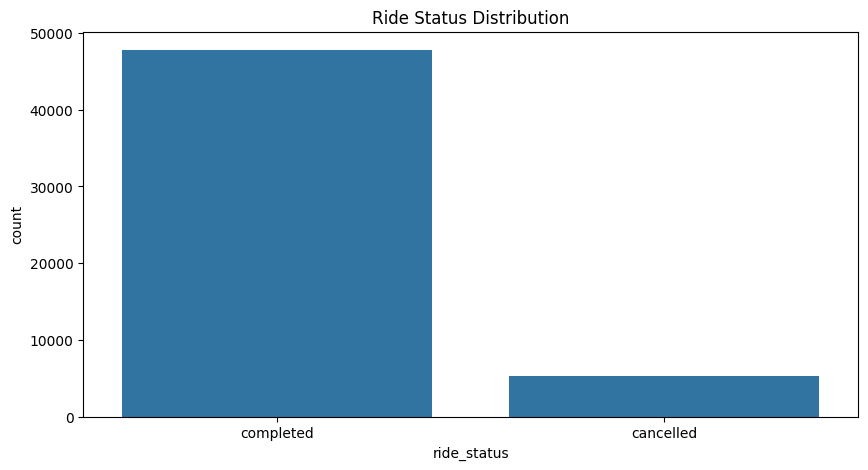

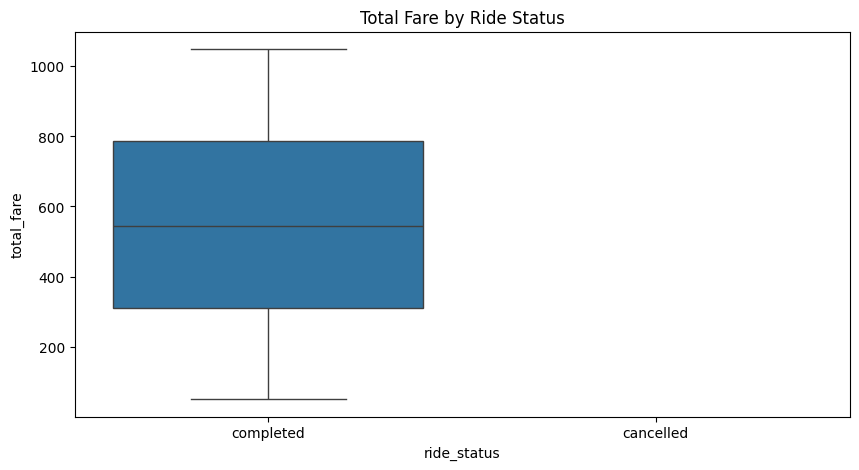

/tmp/ipython-input-4-2054320295.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_counts.index, y=distance_counts.values, palette='viridis')


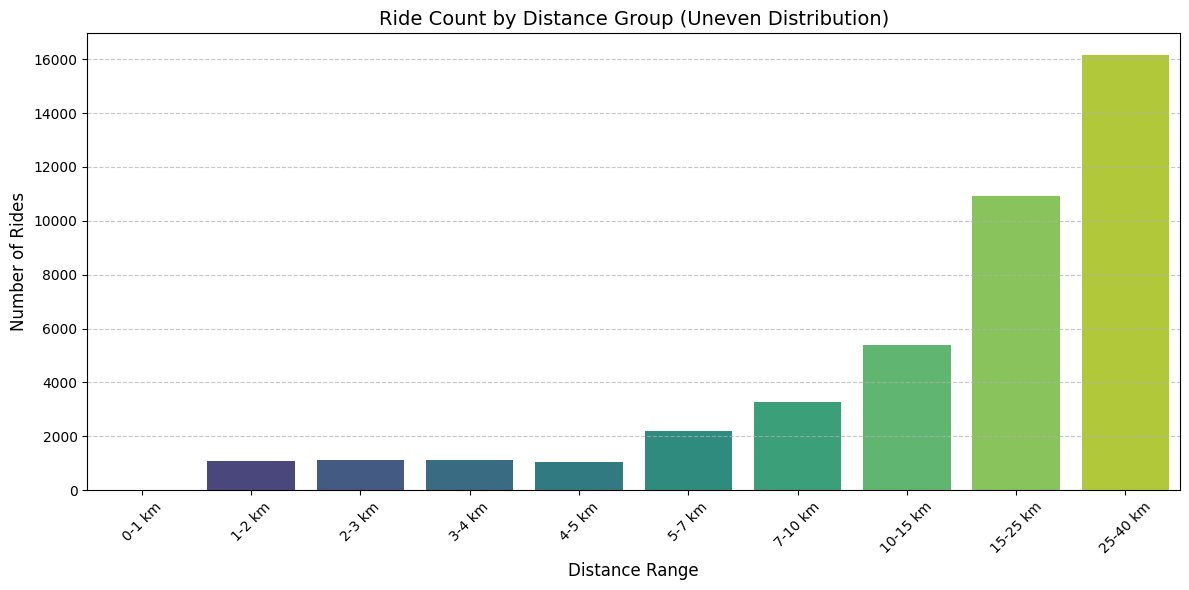

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Preprocessing complete. File downloaded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from google.colab import files

# Upload file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(10,5))
sns.countplot(x='ride_status', data=df)
plt.title("Ride Status Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='ride_status', y='total_fare', data=df)
plt.title("Total Fare by Ride Status")
plt.show()

# Define custom distance bins and labels
bins = [0, 1, 2, 3, 4, 5, 7, 10, 15, 25, 40]
labels = ['0-1 km', '1-2 km', '2-3 km', '3-4 km', '4-5 km',
          '5-7 km', '7-10 km', '10-15 km', '15-25 km', '25-40 km']

# Create a new column for binned distances
df['distance_group'] = pd.cut(df['distance'], bins=bins, labels=labels, right=False)

# Count the rides in each group
distance_counts = df['distance_group'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=distance_counts.index, y=distance_counts.values, palette='viridis')
plt.title("Ride Count by Distance Group (Uneven Distribution)", fontsize=14)
plt.xlabel("Distance Range", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Convert date and time to datetime format
df['date'] = df['date'].astype(str).str.strip()
df['time'] = df['time'].astype(str).str.strip()

df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')

# Handle any invalid datetime values
if df['datetime'].isna().sum() > 0:
    print("Warning: Some datetime values could not be converted. Check input format.")

df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek

# Handle missing values
df.fillna({'ride_charge': df['ride_charge'].median(),
           'misc_charge': df['misc_charge'].median(),
           'total_fare': df['total_fare'].median()}, inplace=True)
df.dropna(inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
df['services'] = label_enc.fit_transform(df['services'])
df['ride_status'] = label_enc.fit_transform(df['ride_status'])
df['payment_method'] = label_enc.fit_transform(df['payment_method'].astype(str))

# Feature scaling for PCA
features = ['duration', 'distance', 'ride_charge', 'misc_charge', 'total_fare', 'hour', 'day_of_week']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=5)
pca_features = pca.fit_transform(df[features])
pca_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(5)])
df = pd.concat([df, pca_df], axis=1)

# Save preprocessed data
df.to_csv("preprocessed_rides.csv", index=False)
files.download("preprocessed_rides.csv")

print("Preprocessing complete. File downloaded.")


/tmp/ipython-input-5-2411769863.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')


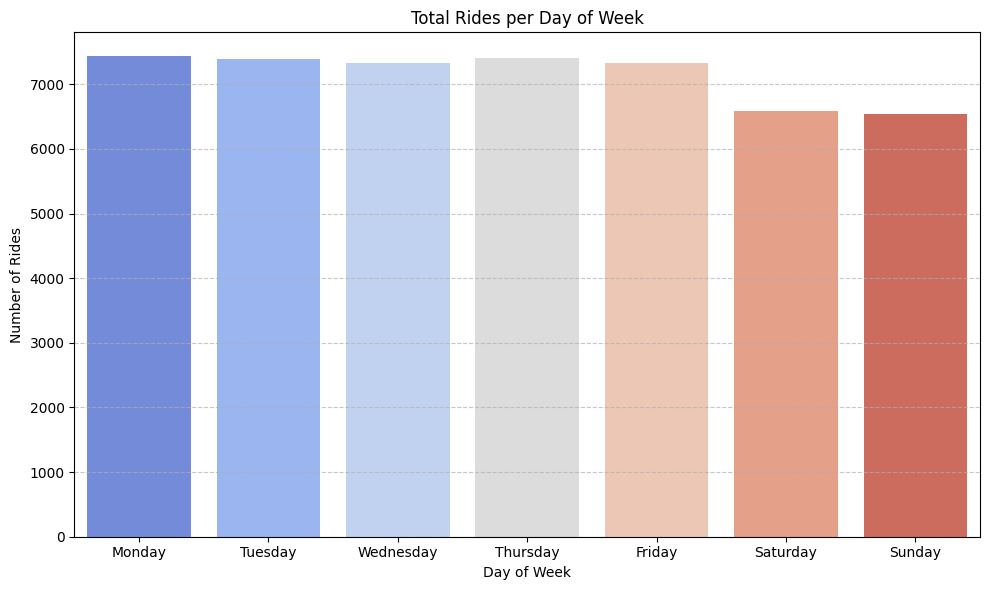

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "bangalore_rides_data_augmented.csv"
df = pd.read_csv(file_path)

# Convert 'date' and 'time' to datetime (if not already done)
df['date'] = df['date'].astype(str).str.strip()
df['time'] = df['time'].astype(str).str.strip()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')

# Create a column for day of week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['datetime'].dt.dayofweek

# Optional: map numeric day to labels
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_map)

# Count rides by day of week
day_counts = df['day_name'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday',
                                                    'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='coolwarm')
plt.title("Total Rides per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Interactive Analysis of Ride Charges and Distance for Selected Dates**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Load dataset
file_path = "bangalore_rides_data_augmented.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Get unique dates for dropdown
unique_dates = df['date'].dt.date.dropna().unique()
unique_dates.sort()

# Dropdown for selecting date
date_selector = widgets.Dropdown(
    options=unique_dates,
    description="Select Date:",
    continuous_update=False
)

# Function to update plots based on selected date
def update_plots(selected_date):
    df_filtered = df[df['date'].dt.date == selected_date]

    if df_filtered.empty:
        print(f"No data available for {selected_date}")
        return

    # Bar plot: Total Ride Charge per Source
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df_filtered['source'], y=df_filtered['ride_charge'], estimator=sum, ci=None, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel("Source")
    plt.ylabel("Total Ride Charge")
    plt.title(f"Total Ride Charge from Different Sources on {selected_date}")
    plt.show()

    # Scatter plot: Distance vs Ride Charge
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_filtered['distance'], y=df_filtered['ride_charge'], hue=df_filtered['source'], alpha=0.6)
    plt.xlabel("Distance (km)")
    plt.ylabel("Ride Charge (INR)")
    plt.title(f"Distance vs Ride Charge on {selected_date}")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    # Box plot: Fare distribution across sources
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='source', y='ride_charge', data=df_filtered)
    plt.xticks(rotation=90)
    plt.xlabel("Source")
    plt.ylabel("Ride Charge (INR)")
    plt.title(f"Ride Charge Distribution per Source on {selected_date}")
    plt.show()

# Display interactive dropdown
widgets.interactive(update_plots, selected_date=date_selector)


interactive(children=(Dropdown(description='Select Date:', options=(datetime.date(2024, 6, 17), datetime.date(…

# **COMPLETED AND CANCELLED RIDES BASED ON LOCATION**


Completed vs Cancelled Rides Per Source:

         source  cancelled  completed
     BTM Layout        501       4464
   Banashankari        141       1287
   Basavanagudi        161       1295
      Bellandur        149       1298
Electronic City        485       4407
     HSR Layout        534       4451
         Hebbal        157       1302
    Indiranagar        151       1285
      Jayanagar        496       4466
       KR Puram        161       1298
        Kengeri        133       1246
    Koramangala        285       2715
        MG Road        146       1319
       Majestic        493       4591
   Marathahalli        325       2675
    Rajajinagar        127       1354
  Richmond Town        139       1250
         Ulsoor        143       1269
     Whitefield        483       4559
   Yeshwanthpur        138       1275


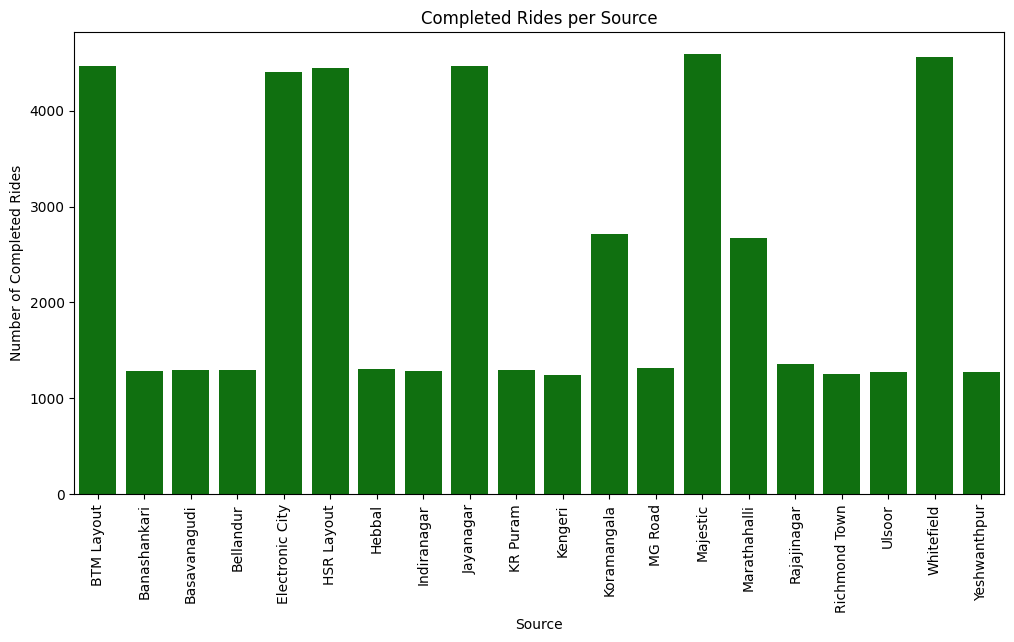

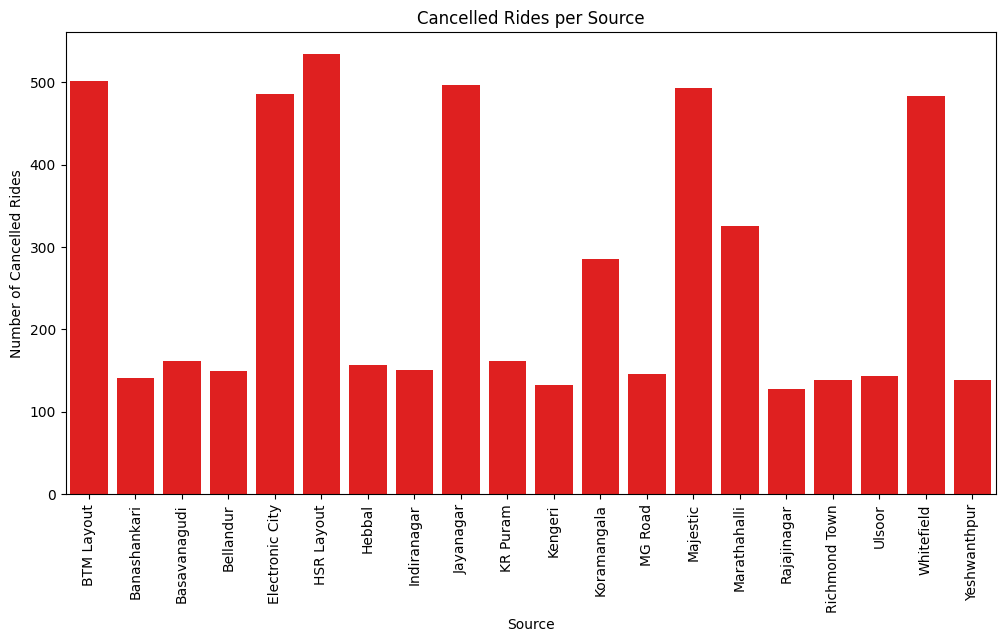

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

df = pd.read_csv(file_path)

# Count of completed and cancelled rides per source (without dropping NaN values)
status_counts = df.groupby(['source', 'ride_status']).size().unstack(fill_value=0).reset_index()

# Ensure 'completed' and 'cancelled' columns exist
if 'completed' not in status_counts.columns:
    status_counts['completed'] = 0
if 'cancelled' not in status_counts.columns:
    status_counts['cancelled'] = 0

# Print table of completed and cancelled rides per source
print("\nCompleted vs Cancelled Rides Per Source:\n")
print(status_counts.to_string(index=False))

# Separate DataFrames for completed and cancelled rides
completed_df = status_counts[['source', 'completed']]
cancelled_df = status_counts[['source', 'cancelled']]

# Plot Completed Rides
plt.figure(figsize=(12, 6))
sns.barplot(x="source", y="completed", data=completed_df, color='green')
plt.xticks(rotation=90)
plt.xlabel("Source")
plt.ylabel("Number of Completed Rides")
plt.title("Completed Rides per Source")
plt.show()

# Plot Cancelled Rides
plt.figure(figsize=(12, 6))
sns.barplot(x="source", y="cancelled", data=cancelled_df, color='red')
plt.xticks(rotation=90)
plt.xlabel("Source")
plt.ylabel("Number of Cancelled Rides")
plt.title("Cancelled Rides per Source")
plt.show()
